In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn import datasets
from sqlalchemy import create_engine

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Standarizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [3]:
kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(X_scaled)
y_pred = kmeans_cluster.predict(X_scaled)


34.4 ms ± 7.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


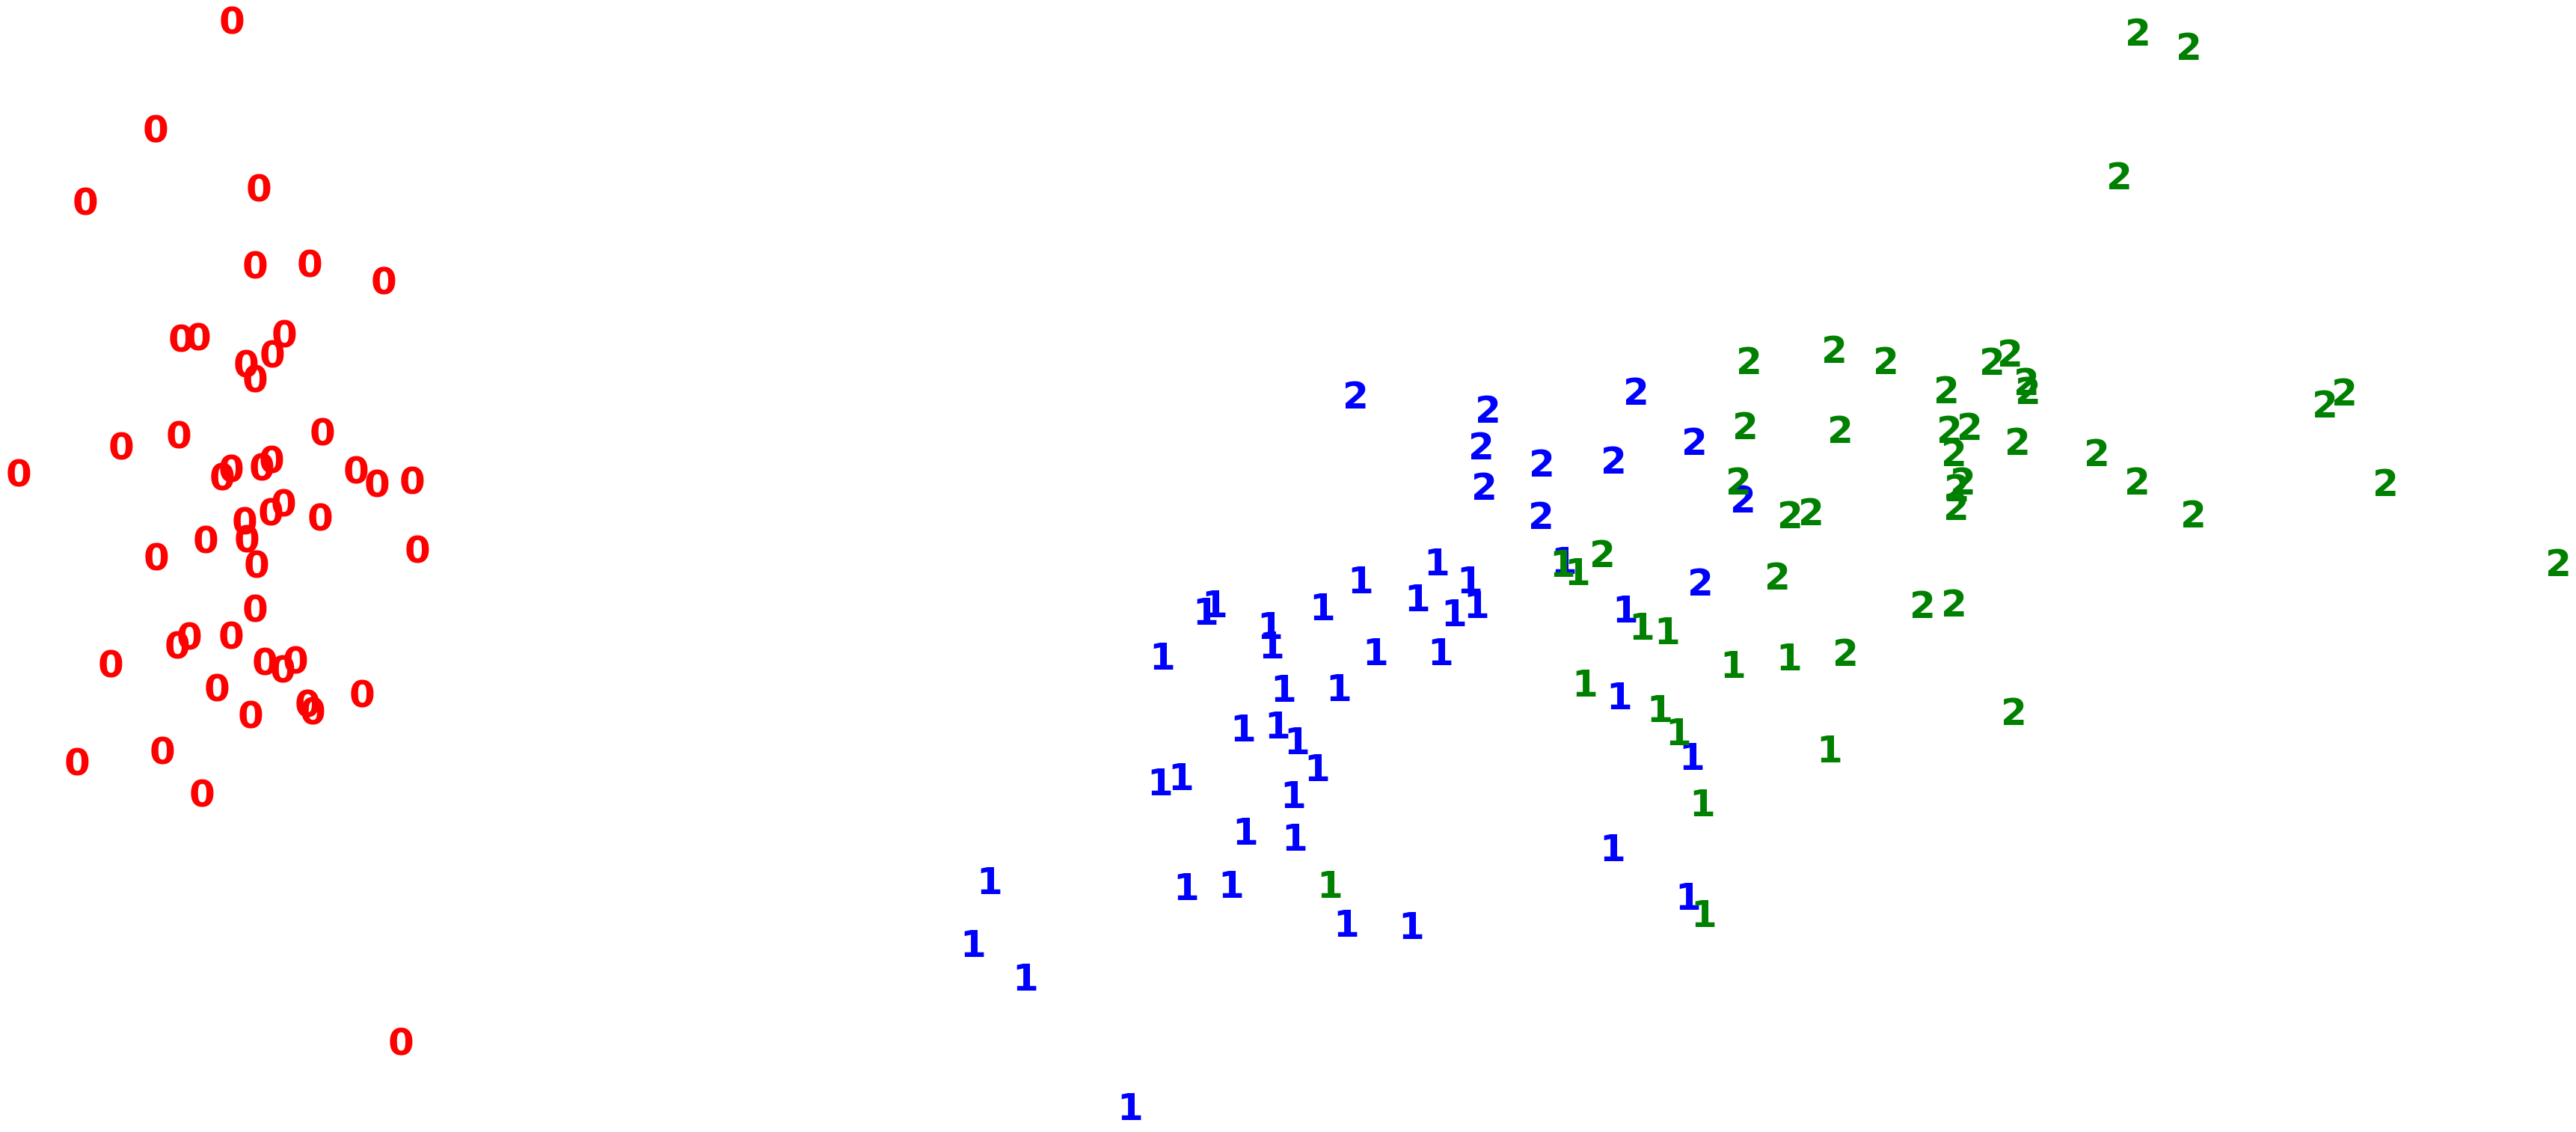

In [4]:
pca = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [25]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'heartdisease'

In [26]:
engine = create_engine(
    "postgresql://{}:{}@{}:{}/{}".format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db
    )
)

df = pd.read_sql_query("select * from heartdisease", con=engine)
engine.dispose()

In [27]:
df.shape

(303, 14)

In [28]:
 # Define the features and the outcome
 X = df.iloc[:, :13]
 y = df.iloc[:, 13]

 # Replace missing values (marked by `?`) with a `0`
 X = X.replace(to_replace='?', value=0)

 # Binarize `y` so that `1` means heart disease diagnosis and `0` means no diagnosis
 y = np.where(y > 0, 0, 1)

In [29]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
kmeans_cluster = KMeans(n_clusters=2, random_state=42)

# Fit model
%timeit kmeans_cluster.fit(X_scaled)
y_pred = kmeans_cluster.predict(X_scaled)

48.8 ms ± 2.76 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


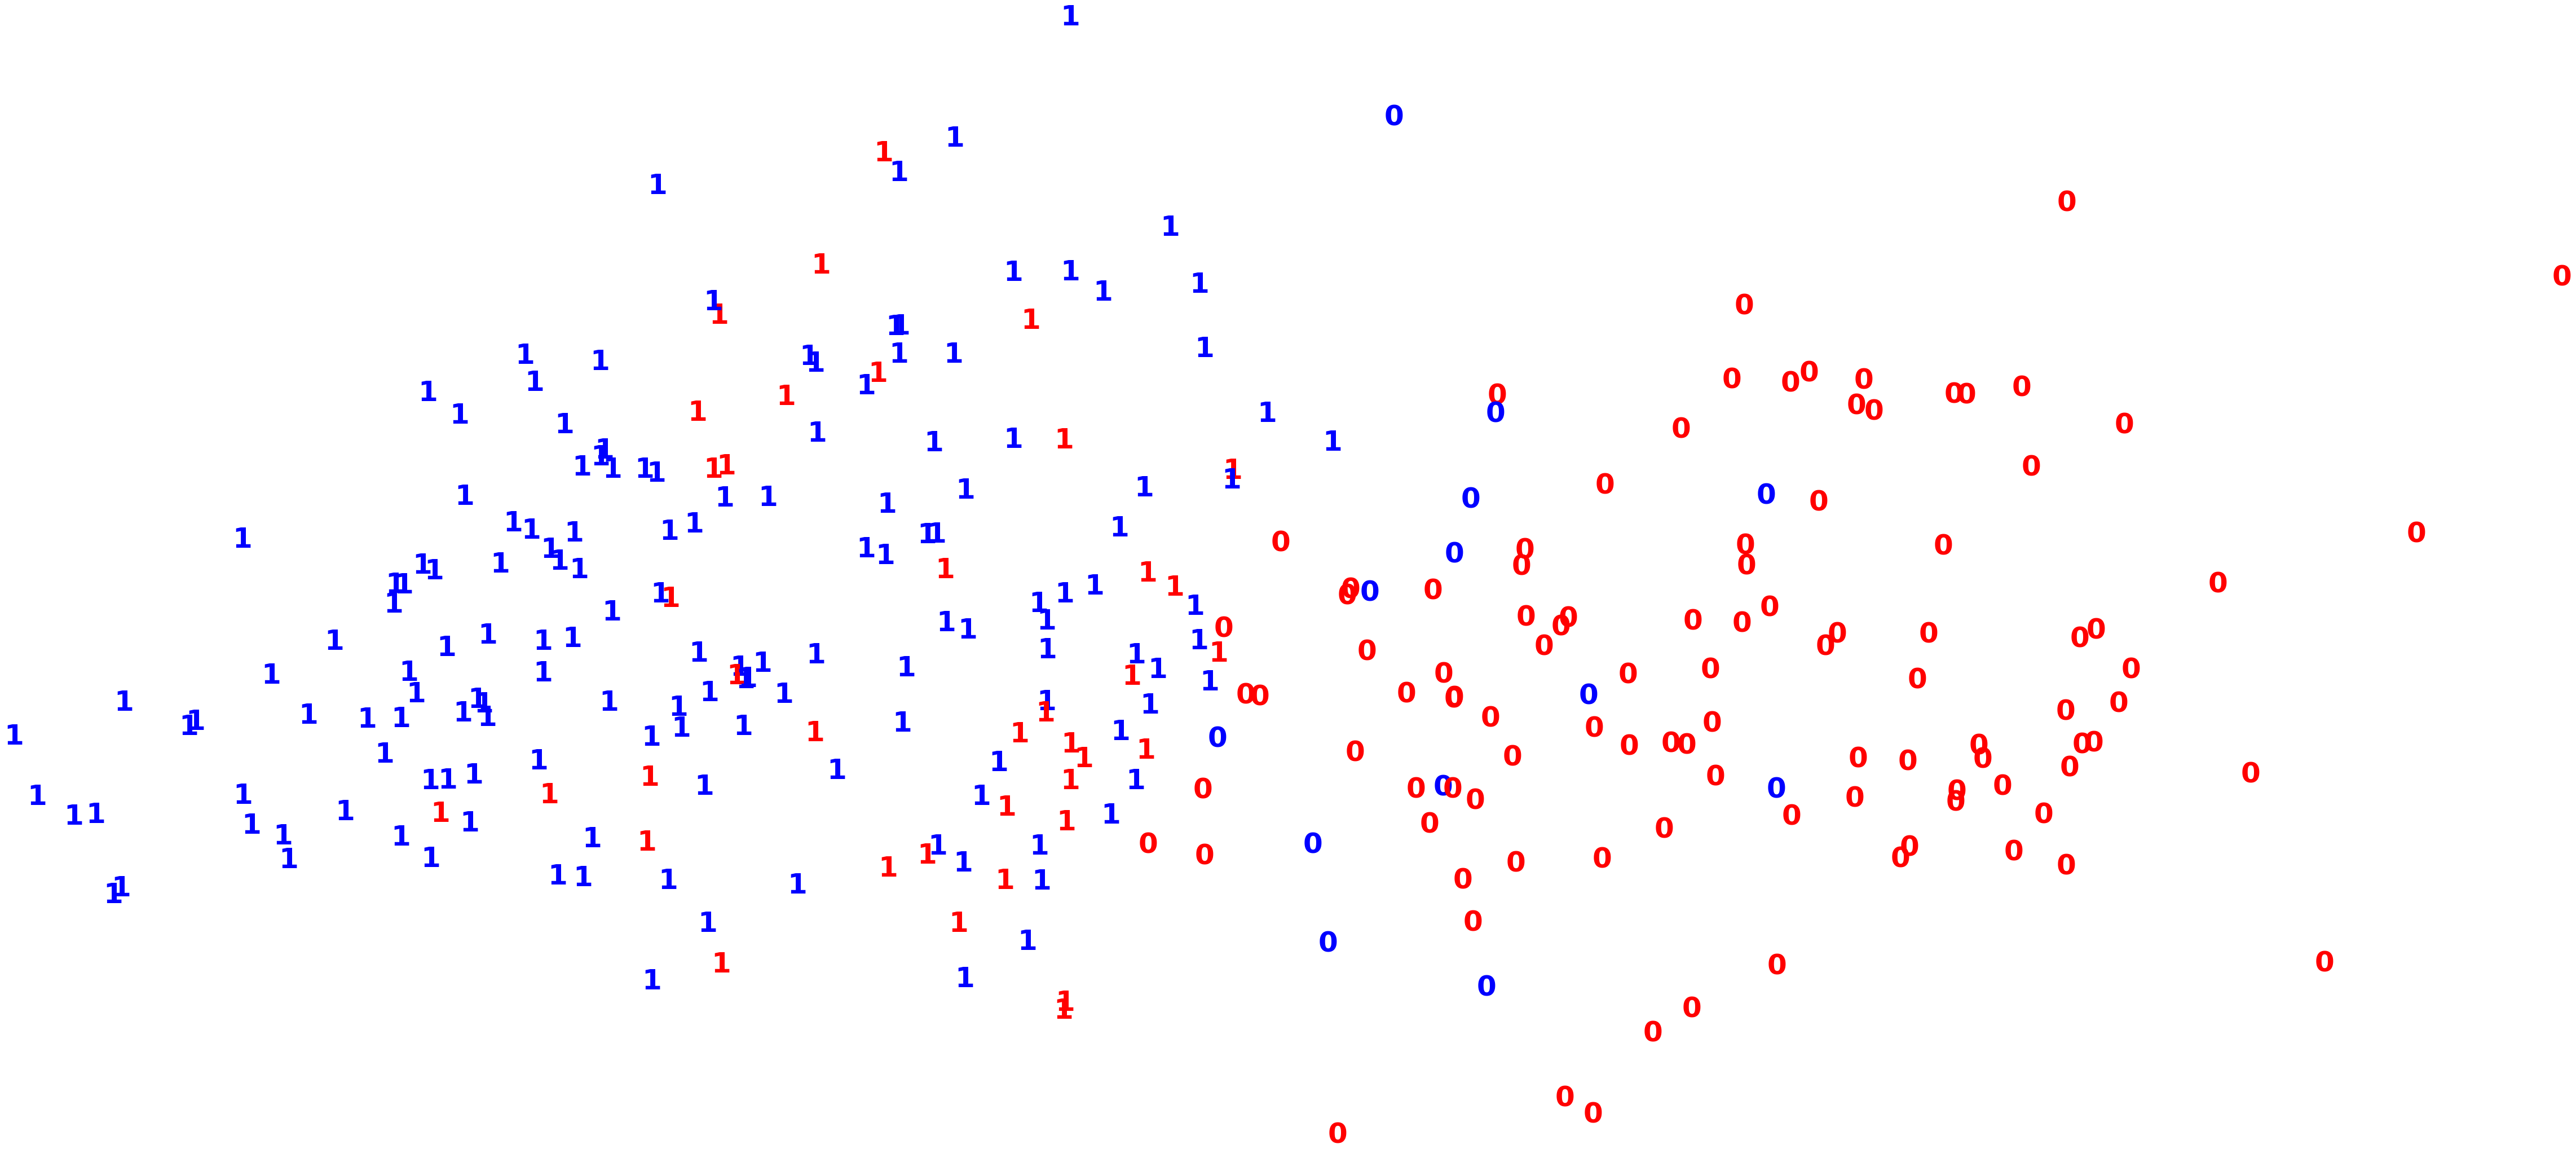

In [31]:
pca = PCA(n_components=2).fit_transform(X_scaled)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

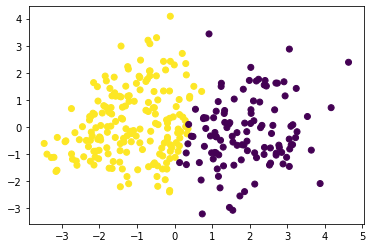

In [32]:
plt.scatter(pca[:, 0], pca[:, 1], c=y_pred)
plt.show()

In [33]:
print(pd.crosstab(y_pred, y))

col_0    0    1
row_0          
0      101   13
1       38  151
